<div class="alert alert-block alert-info" align=center><b></b>

# Recommendation System

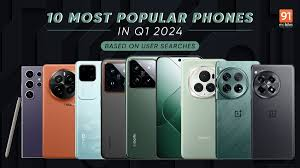

In [15]:
from IPython.display import Image
Image(filename='images.jpg')

<div class="alert alert-block alert-info" align=center><b></b>

# Problem Statement

Online reviews are important because they have become a reference point for buyers across the globe and because so many people trust them when making purchase decisions.


Reviews are also important for Search Engine Optimization (SEO). Having positive reviews is also another way through which you can improve a website’s Search Engine visibility. The more that people talk about a brand online, the greater its visibility to Search Engines, such as Google, Yahoo and Bing.



<div class="alert alert-block alert-info" align=center><b></b>

# LET'S START

<div class="alert alert-block alert-info" align=center><b></b>
    
    My Name is PAVAN KALYAN and  I will take you the journey of Recommendation system

## Importing libraries

In [17]:
import os
import gc
import shutil
from pathlib import Path
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
warnings.filterwarnings('ignore')

## Importing datasets

In [18]:
data = pd.read_csv('mobile_recommendation_system_dataset.csv')
data.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


# EDA - Exploratory Data Analysis

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   object 
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.6+ KB


In [20]:
data.isnull().sum()

name        0
ratings     0
price       0
imgURL      0
corpus     12
dtype: int64

In [21]:
data.loc[data.isnull().any(axis = 1)]

,name,ratings,price,imgURL,corpus
17,A10E,4.1,1299,https://rukminim2.flixcart.com/image/312/312/x...,NaN
169,SAMSUNG GT-E1215ZKAINS,4.3,1150,https://rukminim2.flixcart.com/image/312/312/k...,NaN
525,"MOTOROLA Edge 40 (Nebula Green, 256 GB)",4.2,29999,https://rukminim2.flixcart.com/image/312/312/x...,NaN
1280,SAMSUNG GT-E1215,4.3,1499,https://rukminim2.flixcart.com/image/312/312/k...,NaN
1515,SAMSUNG GT 1200 R/I/M,4.4,1499,https://rukminim2.flixcart.com/image/312/312/t...,NaN
1619,SAMSUNG GT-E1215ZDAINS,4.2,1299,https://rukminim2.flixcart.com/image/312/312/j...,NaN
1762,a 10e,4.4,1319,https://rukminim2.flixcart.com/image/312/312/x...,NaN
1857,"SAMSUNG Galaxy F41 (Fusion Black, 64 GB)",4.0,15999,https://rukminim2.flixcart.com/image/312/312/k...,NaN
1875,"SAMSUNG Galaxy M13 (Aqua Green, 128 GB)",4.3,13999,https://rukminim2.flixcart.com/image/312/312/x...,NaN
1962,"MOTOROLA e13 (Creamy White, 64 GB)",3.9,6499,https://rukminim2.flixcart.com/image/312/312/x...,NaN


**Insights**:

We can probably just remove these rows as it provides almost no value to us.

In [22]:
data.dropna(inplace = True)
data.isnull().sum()

name       0
ratings    0
price      0
imgURL     0
corpus     0
dtype: int64

In [23]:
# Current shape of dataset
data.shape

(2534, 5)

In [24]:
# Let's review our dataset again and see what we can do with it
display(data.head())
display(data.tail())

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


,name,ratings,price,imgURL,corpus
2540,"SAMSUNG Galaxy S20 FE 5G (Cloud Navy, 128 GB)",4.2,27440,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 10Processor S...
2541,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,Storage64 GBRAM4 GBExpandable Storage512GB Sy...
2542,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 11Processor S...
2544,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 25...",4.3,20463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 12Processor ...
2545,"vivo T2x 5G (Aurora Gold, 128 GB)",4.4,13999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 13Processor T...


**Insights**:

Of course the corpus provides lots of important data we can use to generate our data vectors which we can then use in our similarity match using cosine similarity, more on that later.

But notice in the price category of the dataset, it is not standardised properly i.e there are currency symbols or commas in our data, we should fix it.

In [25]:
data['price']

0         23999
1       ₹20,999
2         13149
3         21999
4          3537
         ...   
2540      27440
2541      11999
2542      30203
2544      20463
2545      13999
Name: price, Length: 2534, dtype: object

In [26]:
# Let's use RegEx
data['price_fixed'] = data['price'].replace('[^\d]', '', regex = True).astype(int)
data[['price', 'price_fixed']]

,price,price_fixed
0,23999,23999
1,"₹20,999",20999
2,13149,13149
3,21999,21999
4,3537,3537
...,...,...
2540,27440,27440
2541,11999,11999
2542,30203,30203
2544,20463,20463


In [27]:
#Let's replace the old price with our new price data
data['price'] = data['price_fixed']
data.drop('price_fixed', axis = 1, inplace = True)

In [28]:
data.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


In [29]:
example = data['corpus'].sample(1)
example.values

array(['Storage128 GBRAM6  SystemAndroid Q 11Processor Speed2.4 50MP 5G Capacity5000 Display Size16.76 cm (6.6 inch)Resolution2400 x 1080 pixel'],
      dtype=object)

# Cleaning process

1. Extract important features from the corpus or name.
2. Filling up NaN values manually by searching up the web.

In [30]:
import re

def extract_brand(text):
    return text.split()[0]

def extract_ram(text):
    match = re.search(r'RAM(\d+)', text)
    if match:
        return int(match.group(1))
    return None

def extract_system(text):
    match = re.search(r'System(.*?)Processor', text)
    if match:
        return match.group(1).strip()
    return None

def extract_processor(text):
    match = re.search(r'Processor (.*?) ', text)
    if match:
        return match.group(1).strip()
    return None

def extract_storage(text):
    match = re.search(r'Storage(\d+)', text)
    if match:
        return int(match.group(1))
    return None

In [31]:
data['Brand'] = data['name'].apply(extract_brand)
data['RAM'] = data['corpus'].apply(extract_ram)
data['System'] = data['corpus'].apply(extract_system)
data['Processor'] = data['corpus'].apply(extract_processor)
data['Storage'] = data['corpus'].apply(extract_storage)

In [32]:
unique_systems = data['System'].unique()
unique_processors = data['Processor'].unique()
unique_systems, unique_processors

(array(['Android 12', 'Android Pie 9.0', 'Android 11', 'Android Q 11',
        'iOS 15', 'iOS 9', 'Android 13', 'Android Pie 9',
        'Android Nougat 7', 'Android 10', 'iOS 16', None,
        'Android Q Android Q 12.5', 'Android Oreo 8.1',
        'Android Marshmallow 6.0.1', 'Android Oreo 8.1.0',
        'Android 13 (Go Edition)', 'Android Android 12', 'Android Q 10',
        'iOS 14.2', 'Android Pie Android v9.0 (Pie)', 'Android Andriod 11',
        'Android Android 10',
        'Android HiOS 8.6 based on Android 12-Go Edition',
        'Android Nougat 7.1', 'iOS 14', 'Android Android 13', 'iOS 12',
        'Android 12 Go', 'iOS 7', 'Android Nougat 7.1.2',
        'Android Oreo V11', 'Android ANdroid 13 OxygenOS',
        'Android Android 13.0', 'Android Android v12.0',
        'Android Android 11', 'Android Pie 10', 'Android Oreo 8.0', 'Q 10',
        'Android Q ANDROID 10', 'Android Q 12', 'iOS 13',
        'Android Android 11 Go', 'Android 10 (Go Edition)',
        'Android Oxy

In [33]:
def clean_processor(processor):
    if pd.isnull(processor):
        return None
    if 'mediatek' in processor.lower():
        return 'MediaTek'
    if 'qualcomm' in processor.lower():
        return 'Qualcomm'
    if 'apple' in processor.lower():
        return 'Apple'
    return 'Other'

data['Processor'] = data['Processor'].apply(clean_processor)

In [34]:
data['Processor'].unique()

array(['MediaTek', 'Other', 'Qualcomm', None, 'Apple'], dtype=object)

In [35]:
def clean_system(system):
    if pd.isnull(system):
        return None
    if 'android' in system.lower():
        return 'Android'
    if 'ios' in system.lower():
        return 'iOS'
    if 'tizen' in system.lower():
        return 'Tizen'
    return system

data['System'] = data['System'].apply(clean_system)

In [36]:
data['System'].unique()

array(['Android', 'iOS', None, 'Q 10', 'Series 30 Feature phone', '1',
       'Series 30', 'Tizen'], dtype=object)

In [37]:
data.loc[data.RAM.isnull()].head(10)

,name,ratings,price,imgURL,corpus,Brand,RAM,System,Processor,Storage
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,APPLE,NaN,iOS,Other,128.0
5,"APPLE iPhone 6s Plus (Gold, 64 GB)",4.5,5537,https://rukminim2.flixcart.com/image/312/312/m...,Storage64 SystemiOS 9Processor TypeA9 Chip 12...,APPLE,NaN,iOS,Other,64.0
16,"APPLE iPhone 14 Plus ((PRODUCT)RED, 256 GB)",4.6,24463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 SystemiOS 16Processor TypeA15 Bion...,APPLE,NaN,iOS,Other,256.0
28,"OPPO Reno10 5G (Ice Blue, 256 GB)",4.6,32537,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 SystemAndroid 13Processor TypeDimen...,OPPO,NaN,Android,Other,256.0
40,"APPLE iPhone XR ((PRODUCT)RED, 64 GB)",4.4,28537,https://rukminim2.flixcart.com/image/312/312/j...,Storage64 SystemiOS 14.2Processor TypeA12 Bio...,APPLE,NaN,iOS,Other,64.0
43,"APPLE iPhone 14 Pro (Gold, 256 GB)",4.7,73,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 SystemiOS 16Processor TypeA16 Bion...,APPLE,NaN,iOS,Other,256.0
54,"APPLE iPhone 14 Plus (Midnight, 256 GB)",4.4,24463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 SystemiOS 16Processor TypeA15 Bion...,APPLE,NaN,iOS,Other,256.0
72,"APPLE iPhone 6s (Silver, 64 GB)",4.5,15537,https://rukminim2.flixcart.com/image/312/312/m...,Storage64 SystemiOS 9Processor TypeA9 Chip 12...,APPLE,NaN,iOS,Other,64.0
75,"APPLE iPhone 14 Pro Max (Gold, 512 GB)",4.7,26927,https://rukminim2.flixcart.com/image/312/312/x...,Storage512 SystemiOS 16Processor TypeA16 Bion...,APPLE,NaN,iOS,Other,512.0
78,"APPLE iPhone 13 Pro Max (Sierra Blue, 1 TB)",4.6,24927,https://rukminim2.flixcart.com/image/312/312/k...,Storage1024 SystemiOS 15Processor TypeA15 Bio...,APPLE,NaN,iOS,Other,1024.0


In [38]:
np.sort(data.loc[data.name.str.contains('iPhone')].name.values)

array(['APPLE iPhone 11 (Black, 128 GB)',
       'APPLE iPhone 11 (Black, 64 GB)',
       'APPLE iPhone 11 (Purple, 128 GB)',
       'APPLE iPhone 11 (Purple, 64 GB)', 'APPLE iPhone 11 (Red, 128 GB)',
       'APPLE iPhone 11 (White, 128 GB)',
       'APPLE iPhone 11 (White, 64 GB)',
       'APPLE iPhone 11 (Yellow, 64 GB)',
       'APPLE iPhone 11 (Yellow, 64 GB)',
       'APPLE iPhone 11 Pro (Gold, 256 GB)',
       'APPLE iPhone 11 Pro (Gold, 512 GB)',
       'APPLE iPhone 11 Pro (Gold, 64 GB)',
       'APPLE iPhone 11 Pro (Midnight Green, 256 GB)',
       'APPLE iPhone 11 Pro (Midnight Green, 64 GB)',
       'APPLE iPhone 11 Pro (Silver, 256 GB)',
       'APPLE iPhone 11 Pro (Silver, 512 GB)',
       'APPLE iPhone 11 Pro (Silver, 64 GB)',
       'APPLE iPhone 11 Pro (Space Grey, 256 GB)',
       'APPLE iPhone 11 Pro (Space Grey, 512 GB)',
       'APPLE iPhone 11 Pro (Space Grey, 64 GB)',
       'APPLE iPhone 11 Pro Max (Gold, 256 GB)',
       'APPLE iPhone 11 Pro Max (Midnight Green,

In [39]:
iphone_ram_mapping = {
    'iPhone 14': 6,
    'iPhone 13': 4,
    'iPhone 13 Pro': 6,
    'iPhone 12': 4,
    'iPhone 12 Pro': 6,
    'iPhone 11': 4,
    'iPhone X': 3,
    'iPhone XR': 3,
    'iPhone XS': 4,
    'iPhone 8': 2,
    'iPhone 8 Plus': 3,
    'iPhone 7': 2,
    'iPhone 7 Plus': 3,
    'iPhone 6': 1,
    'iPhone 6S': 2,
    'iPhone 5': 1,
    'iPhone SE': 2,
    'iPhone SE 3rd Gen': 4, 
    'IPhone 4': .512
}

for model_name, ram_value in iphone_ram_mapping.items():
    data.loc[data.name.str.contains(model_name, case = True), 'RAM'] = ram_value

In [40]:
data.loc[data.RAM.isnull()].name

28            OPPO Reno10 5G (Ice Blue, 256 GB)
108                        SAMSUNG Guru Music 2
130                      SAMSUNG GT-E1215ZWAINS
253                        SAMSUNG Guru Music 2
279       OPPO Reno10 5G (Silvery Grey, 256 GB)
500     Infinix Smart 7 HD (Green Apple, 64 GB)
573           OPPO Reno10 5G (Ice Blue, 256 GB)
600       OPPO Reno10 5G (Silvery Grey, 256 GB)
958        SAMSUNG Galaxy A2 Core (Blue, 16 GB)
998                        SAMSUNG Guru Music 2
1110                       SAMSUNG Guru FM Plus
1250          OPPO Reno10 5G (Ice Blue, 256 GB)
1357            SAMSUNG Guru FM Plus SM-B110E/D
1400          SAMSUNG Galaxy A13 (White, 64 GB)
1514          OPPO Reno10 5G (Ice Blue, 256 GB)
1609          OPPO Reno10 5G (Ice Blue, 256 GB)
1705          OPPO Reno10 5G (Ice Blue, 256 GB)
1794                       SAMSUNG Guru Music 2
2250                          SAMSUNG Metro 313
Name: name, dtype: object

In [41]:
other_phones_ram_mapping = {
    'OPPO Reno10 5G': 8,
    'SAMSUNG Guru Music 2': 0.008,
    'SAMSUNG GT-E1215ZWAINS': 0,
    'Infinix Smart 7 HD': 2,
    'SAMSUNG Galaxy A2 Core': 1,
    'SAMSUNG Guru FM Plus': 0.004,
    'SAMSUNG Galaxy A13': 4,
    'SAMSUNG Metro 313': 0.016    
}

for model_name, ram_value in other_phones_ram_mapping.items():
    data.loc[data.name.str.contains(model_name, case = True), 'RAM'] = ram_value

In [42]:
data.loc[data.System.isnull()].name.values

array(['Xiaomi 11T Pro 5G Hyperphone (Celestial Magic, 256 GB)',
       'REDMI 11 Prime 5G (Meadow Green, 128 GB)', 'a 10e',
       'Tecno Spark 8 Pro (Turquoise Cyan, 64 GB)',
       'OnePlus NORD CE2 LITE 5G (Blue, Black, 128 GB)',
       'SAMSUNG Guru Music 2', 'Tecno Spark Go 2022 (Iris Purple, 32 GB)',
       'Xiaomi 11T Pro 5G Hyperphone (Meteorite Black, 256 GB)',
       'vivo Z1x (Fusion Blue, 128 GB)', 'SAMSUNG Guru FM Plus',
       'Tecno Spark 10 pro (Meta Blue, 8 GB)',
       'OnePlus 10R 5G (Sierra Black, 256 GB)',
       'OPPO F23 5G | 64MP Rear Triple AI Camera | 6.72" FHD+ 120Hz Display (Cool Black, 256 GB)',
       'OnePlus 10R 5G (Prime Blue, 128 GB)',
       'Tecno Spark 10 5G (Meta Blue, 128 GB)', 'SAMSUNG Metro 313',
       'REDMI 12C (Royal Blue, 6 GB)',
       'REDMI 11 Prime 5G (Thunder Black, 64 GB)',
       'APPLE IPhone 4 (White, 8 GB)', 'Peace Mi2',
       'OPPO F23 5G | 64MP Rear Triple AI Camera | 6.72" FHD+ 120Hz Display (Bold Gold, 256 GB)',
       'Tecn

In [43]:
data.System.fillna('Android', inplace = True)

In [44]:
data.loc[data.Processor.isnull()].name.values

array(['Xiaomi 11T Pro 5G Hyperphone (Celestial Magic, 256 GB)',
       'REDMI 11 Prime 5G (Meadow Green, 128 GB)', 'a 10e',
       'Tecno Spark 8 Pro (Turquoise Cyan, 64 GB)',
       'OnePlus NORD CE2 LITE 5G (Blue, Black, 128 GB)',
       'SAMSUNG Guru Music 2', 'Tecno Spark Go 2022 (Iris Purple, 32 GB)',
       'Xiaomi 11T Pro 5G Hyperphone (Meteorite Black, 256 GB)',
       'vivo Z1x (Fusion Blue, 128 GB)', 'SAMSUNG Guru FM Plus',
       'Tecno Spark 10 pro (Meta Blue, 8 GB)',
       'OnePlus 10R 5G (Sierra Black, 256 GB)',
       'OPPO F23 5G | 64MP Rear Triple AI Camera | 6.72" FHD+ 120Hz Display (Cool Black, 256 GB)',
       'OnePlus 10R 5G (Prime Blue, 128 GB)',
       'Tecno Spark 10 5G (Meta Blue, 128 GB)', 'SAMSUNG Metro 313',
       'REDMI 12C (Royal Blue, 6 GB)',
       'REDMI 11 Prime 5G (Thunder Black, 64 GB)',
       'APPLE IPhone 4 (White, 8 GB)', 'Peace Mi2',
       'OPPO F23 5G | 64MP Rear Triple AI Camera | 6.72" FHD+ 120Hz Display (Bold Gold, 256 GB)',
       'Tecn

In [45]:
phone_processor_mapping = {
    'Xiaomi': 'Qualcomm',
    'REDMI': 'MediaTek',
    'Tecno': 'MediaTek',
    'OPPO': 'Qualcomm',
    'OnePlus': 'MediaTek',
    'SAMSUNG': 'Other',
    'IPhone 4': 'Other',
    'MOTOROLA': 'Qualcomm',
    'vivo Z1x': 'Qualcomm',
    'realme': 'MediaTek',
    'a 10e': 'Other',
    'A10E': 'Other',
    'Peace': 'Other'
}

for model_name, processor_name in phone_processor_mapping.items():
    condition = (data.name.str.contains(model_name, case=True)) & (pd.isna(data['Processor']))
    data.loc[condition, 'Processor'] = processor_name

In [46]:
missing_storage_mapping = {
    'SAMSUNG Guru Music 2': 16,
    'SAMSUNG GT-E1215ZWAINS': 0,
    'SAMSUNG Galaxy A2 Core': 16,
    'SAMSUNG Guru FM Plus': 0,
    'SAMSUNG Galaxy A13': 64, 
}

for model_name, storage_value in missing_storage_mapping.items():
    data.loc[data.name.str.contains(model_name, case = True), 'Storage'] = storage_value

# Recommendation Function

In [47]:
def recommend(brand = None, system = None, min_price = None, max_price = None, top_n = 10):
    filtered_data = data[
        (data['Brand'] == brand) &
        (data['System'] == system) &
        (data['price'] >= min_price) &
        (data['price'] <= max_price)
    ]
    
    if filtered_data.empty:
        filtered_data = data[
            (data['Brand'] == brand) &
            (data['price'] >= min_price) &
            (data['price'] <= max_price)
        ]
    
    if filtered_data.empty:
        filtered_data = data[
            (data['price'] >= min_price) &
            (data['price'] <= max_price)
        ]
        
    if filtered_data.empty:
        filtered_data = data[
            (data['Brand'] == brand)
        ]
    
    if filtered_data.empty:
        filtered_data = data[
            (data['System'] == system)
        ]
    
    if filtered_data.empty:
        print('No preferences listed!')
        return
    
    recommendations = filtered_data.sort_values(by = 'ratings', ascending = False).head(top_n)
    return list(recommendations.name.values)

# Test function

In [48]:
recommend('Apple')

['Apple iPhone XR (Blue, 64 GB) (Includes EarPods, Power Adapter)',
 'Apple iPhone XR ((PRODUCT)RED, 256 GB) (Includes EarPods, Power Adapter)',
 'Apple iPhone SE (Black, 64 GB) (Includes EarPods, Power Adapter)',
 'Apple iPhone SE (White, 128 GB) (Includes EarPods, Power Adapter)',
 'Apple iPhone SE (Red, 256 GB) (Includes EarPods, Power Adapter)',
 'Apple iPhone SE (Black, 128 GB) (Includes EarPods, Power Adapter)',
 'Apple iPhone XR (Black, 256 GB) (Includes EarPods, Power Adapter)',
 'Apple iPhone XR (Coral, 64 GB) (Includes EarPods, Power Adapter)',
 'Apple iPhone XR (White, 256 GB) (Includes EarPods, Power Adapter)',
 'Apple iPhone XR (White, 64 GB) (Includes EarPods, Power Adapter)']